In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
data = pd.read_csv('/content/all_kindle_review.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [3]:
data = data[['reviewText','rating']]
data

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,4
11996,I have read all seven books in this series. Ap...,5
11997,This book really just wasn't my cuppa. The si...,3
11998,"tried to use it to charge my kindle, it didn't...",1


In [4]:
data.shape

(12000, 2)

In [5]:
## Missing Values
data.isnull().sum()

,0
reviewText,0
rating,0


In [6]:
data['rating'].unique()

array([3, 5, 4, 2, 1])

In [7]:
data['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


In [8]:
## Preprocessing And Cleaning
data['rating'] = data['rating'].apply(lambda x:0 if x<3 else 1)

In [9]:
data['rating'].value_counts()

,count
rating,
1,8000
0,4000


In [10]:
## 1. lOWER ALL THE CASES
data['reviewText'] = data['reviewText'].str.lower()

In [11]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-z A-z 0-9]+','',data['reviewText'][i])
    review = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',data['reviewText'][i])
    review = BeautifulSoup(review,'lxml').get_text()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

<ipython-input-14-5fffbdc5bd3d>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review,'lxml').get_text()


In [15]:
corpus

['jace rankin may short, he\'s nothing mess with, man hauled saloon undertaker know now. he\'s famous bounty hunter oregon 1890s who, shot man saloon, finished year long quest avenge sister\'s murder trying figure next. snotty-nosed farm boy rescued gang bully offer money kill man forced ranch, reluctantly agrees bring man justice, kill outright. but, first need tell sister\'s widower news.kyla "kyle" springer bailey riding trail sleeping ground past month trying find jace. want revenge man killed husband took ranch, amongst crimes, keen detour jace want take. realizes options, hide behind boy persona best try keep pace. confrontation along way get shot jace discovers kyle\'s kyla, come clean *whole* reason need scoundrel dead hope he\'ll still help her.the book share touching moment slow-blooming romance. kyla, find out, good reason fear men hide behind boy\'s persona. watching jace slowly pull shell help conquer fear endearing. pain real deeply-rooted disappear face sexiness. neither

## Word2Vec

In [19]:
len(corpus)

12000

In [20]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

In [21]:
words = [simple_preprocess(sent) for sent in corpus]

In [22]:
words

[['jace',
  'rankin',
  'may',
  'short',
  'he',
  'nothing',
  'mess',
  'with',
  'man',
  'hauled',
  'saloon',
  'undertaker',
  'know',
  'now',
  'he',
  'famous',
  'bounty',
  'hunter',
  'oregon',
  'who',
  'shot',
  'man',
  'saloon',
  'finished',
  'year',
  'long',
  'quest',
  'avenge',
  'sister',
  'murder',
  'trying',
  'figure',
  'next',
  'snotty',
  'nosed',
  'farm',
  'boy',
  'rescued',
  'gang',
  'bully',
  'offer',
  'money',
  'kill',
  'man',
  'forced',
  'ranch',
  'reluctantly',
  'agrees',
  'bring',
  'man',
  'justice',
  'kill',
  'outright',
  'but',
  'first',
  'need',
  'tell',
  'sister',
  'widower',
  'news',
  'kyla',
  'kyle',
  'springer',
  'bailey',
  'riding',
  'trail',
  'sleeping',
  'ground',
  'past',
  'month',
  'trying',
  'find',
  'jace',
  'want',
  'revenge',
  'man',
  'killed',
  'husband',
  'took',
  'ranch',
  'amongst',
  'crimes',
  'keen',
  'detour',
  'jace',
  'want',
  'take',
  'realizes',
  'options',
  'hide

In [23]:
len(words)

12000

In [24]:
from gensim.models import Word2Vec

In [25]:
model = Word2Vec(words,vector_size=100,window=20, epochs=20)

In [26]:
model.corpus_count

12000

In [27]:
model.wv.index_to_key

['book',
 'story',
 'read',
 'one',
 'like',
 'character',
 'good',
 'would',
 'really',
 'love',
 'it',
 'get',
 'author',
 'time',
 'series',
 'well',
 'reading',
 'much',
 'first',
 'even',
 'short',
 'great',
 'could',
 'know',
 'sex',
 'way',
 'make',
 'little',
 'two',
 'want',
 'the',
 'thing',
 'think',
 'plot',
 'also',
 'romance',
 'find',
 'end',
 'life',
 'see',
 'enjoyed',
 'go',
 'me',
 'never',
 'written',
 'take',
 'that',
 'kindle',
 'many',
 'lot',
 'say',
 'woman',
 'interesting',
 'going',
 'bit',
 'found',
 'thought',
 'give',
 'writing',
 'this',
 'work',
 'another',
 'liked',
 'loved',
 'better',
 'man',
 'her',
 'scene',
 'hot',
 'got',
 'feel',
 'come',
 'still',
 'though',
 'back',
 'enough',
 'novel',
 'there',
 'people',
 'characters',
 'something',
 'made',
 'can',
 'year',
 'bad',
 'world',
 'free',
 'reader',
 'keep',
 'new',
 'part',
 'need',
 'enjoy',
 'together',
 'review',
 'relationship',
 'next',
 'recommend',
 've',
 'friend',
 'felt',
 'them',
 'h

In [28]:
model.wv.similar_by_word('happy')

[('bow', 0.5132724046707153),
 ('closure', 0.5061424970626831),
 ('epilogue', 0.4952479600906372),
 ('hea', 0.4863789975643158),
 ('surprise', 0.4714857339859009),
 ('libby', 0.4520902931690216),
 ('elle', 0.43208637833595276),
 ('ending', 0.43080300092697144),
 ('nice', 0.4303749203681946),
 ('dan', 0.4291892647743225)]

In [29]:
len(model.wv['happy'])

100

In [30]:
def vectorize(doc):
    valid_words = [word for word in doc if word in model.wv.index_to_key]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words],axis=0)

In [31]:
from tqdm import tqdm

In [32]:
words[0]

['jace',
 'rankin',
 'may',
 'short',
 'he',
 'nothing',
 'mess',
 'with',
 'man',
 'hauled',
 'saloon',
 'undertaker',
 'know',
 'now',
 'he',
 'famous',
 'bounty',
 'hunter',
 'oregon',
 'who',
 'shot',
 'man',
 'saloon',
 'finished',
 'year',
 'long',
 'quest',
 'avenge',
 'sister',
 'murder',
 'trying',
 'figure',
 'next',
 'snotty',
 'nosed',
 'farm',
 'boy',
 'rescued',
 'gang',
 'bully',
 'offer',
 'money',
 'kill',
 'man',
 'forced',
 'ranch',
 'reluctantly',
 'agrees',
 'bring',
 'man',
 'justice',
 'kill',
 'outright',
 'but',
 'first',
 'need',
 'tell',
 'sister',
 'widower',
 'news',
 'kyla',
 'kyle',
 'springer',
 'bailey',
 'riding',
 'trail',
 'sleeping',
 'ground',
 'past',
 'month',
 'trying',
 'find',
 'jace',
 'want',
 'revenge',
 'man',
 'killed',
 'husband',
 'took',
 'ranch',
 'amongst',
 'crimes',
 'keen',
 'detour',
 'jace',
 'want',
 'take',
 'realizes',
 'options',
 'hide',
 'behind',
 'boy',
 'persona',
 'best',
 'try',
 'keep',
 'pace',
 'confrontation',
 'a

In [33]:
arr = []
for i in tqdm(range(len(words))):
    arr.append(vectorize(words[i]))

100%|██████████| 12000/12000 [00:33<00:00, 359.33it/s]


In [34]:
arr

[array([-2.33454302e-01,  1.12858251e-01,  1.89807892e-01,  2.81387180e-01,
        -2.86461413e-01,  5.09813568e-03, -4.78040516e-01,  3.11118782e-01,
         6.63678572e-02, -5.55594638e-02,  3.79818119e-02,  7.87163079e-02,
        -2.34999340e-02,  3.93384665e-01,  4.10193264e-01, -7.67818326e-03,
         2.84258187e-01, -3.33586842e-01, -3.02125573e-01, -2.56040394e-01,
         2.08528973e-02, -3.18513036e-01,  1.23508207e-01,  4.17836219e-01,
         5.72221428e-02,  1.87877268e-01, -1.76493227e-01, -2.61102080e-01,
        -4.78027463e-02,  2.27697551e-01,  6.22548200e-02,  2.78766304e-01,
        -4.88859564e-01, -3.58437687e-01, -2.23768260e-02,  6.69389486e-01,
        -2.15197667e-01, -5.15283585e-01,  1.21695705e-01, -3.09588522e-01,
        -2.98259050e-01,  1.17407359e-01,  1.50486603e-01, -1.15249768e-01,
         4.42837290e-02, -4.80439276e-01,  4.29220617e-01, -1.31195039e-01,
        -5.60147241e-02,  4.53074239e-02,  2.17040867e-01,  4.16018963e-01,
         1.5

In [35]:
X = np.array(arr)

In [36]:
X.shape

(12000, 100)

In [37]:
X

array([[-0.2334543 ,  0.11285825,  0.18980789, ..., -0.35448685,
         0.12372923, -0.17960434],
       [ 0.5676151 , -0.84201705, -0.86974317, ..., -0.04558782,
        -0.70291543,  0.19205749],
       [ 0.069724  , -0.02158914, -0.35636225, ..., -0.32959875,
        -0.2088734 , -0.08101577],
       ...,
       [ 0.04276804, -0.36963373,  0.63484794, ..., -0.2596567 ,
        -0.09556627, -0.41016245],
       [ 0.39918843, -0.658447  ,  0.44574857, ...,  0.3767221 ,
         0.18420541,  0.25610366],
       [-0.14351115, -0.08724482, -0.06926349, ..., -0.13294049,
        -0.56739193, -0.28106618]], dtype=float32)

In [38]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.233454,0.112858,0.189808,0.281387,-0.286461,0.005098,-0.478041,0.311119,0.066368,-0.055559,...,0.103733,0.154737,-0.000239,-0.082742,-0.075418,-0.031861,0.147854,-0.354487,0.123729,-0.179604
1,0.567615,-0.842017,-0.869743,-0.043784,-0.787387,-0.131138,-0.462147,-0.136068,-0.849859,0.614040,...,-0.172054,-0.802676,-0.122512,0.309297,0.682076,-0.679421,0.188484,-0.045588,-0.702915,0.192057
2,0.069724,-0.021589,-0.356362,0.374986,-1.130919,-0.899057,0.243313,0.030905,0.070841,0.038656,...,-0.021603,0.121792,-0.104911,0.331603,0.355337,0.194933,-0.091476,-0.329599,-0.208873,-0.081016
3,-0.169755,0.351154,0.255435,0.283312,-1.296135,0.610665,0.254946,-0.088865,-0.226256,-0.126587,...,-0.096964,0.970948,0.170480,0.337911,0.976867,-0.098590,-0.332498,-0.097613,-0.790499,-0.495244
4,1.050394,-0.477205,0.279936,0.221083,1.144908,-1.103805,0.798185,-0.067203,-0.177235,0.855080,...,-0.931247,-0.367916,0.010772,1.000540,0.558811,-1.043687,0.369519,-0.287197,-1.227263,-0.108324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.053169,-0.081753,0.224512,0.115393,-0.590850,-1.534294,1.691268,1.346316,0.340594,1.027326,...,1.276206,-0.735543,0.845957,1.029126,0.277613,0.313242,0.230227,-0.552912,0.675514,1.099707
11996,0.145077,0.095178,-0.865289,0.005786,-0.663772,-0.710647,0.658418,0.334824,-0.450240,0.130993,...,0.067202,-0.333090,0.308338,0.457740,0.474030,-0.337396,0.183530,0.558977,-1.011817,0.021252
11997,0.042768,-0.369634,0.634848,-0.306939,-0.171937,-0.208182,0.047321,0.148383,-0.905308,-0.122315,...,-0.366818,-0.869504,-0.018830,-0.114621,0.688165,-0.935696,-0.345916,-0.259657,-0.095566,-0.410162
11998,0.399188,-0.658447,0.445749,-0.908519,0.016652,0.255252,0.046081,0.503902,-0.409930,0.670850,...,0.339671,-0.397805,1.366341,1.094832,0.289994,-0.898962,-1.358425,0.376722,0.184205,0.256104


In [39]:
y = data['rating']
y.shape

(12000,)

In [40]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.79      0.61      0.69       803
           1       0.82      0.92      0.87      1597

    accuracy                           0.81      2400
   macro avg       0.81      0.76      0.78      2400
weighted avg       0.81      0.81      0.81      2400



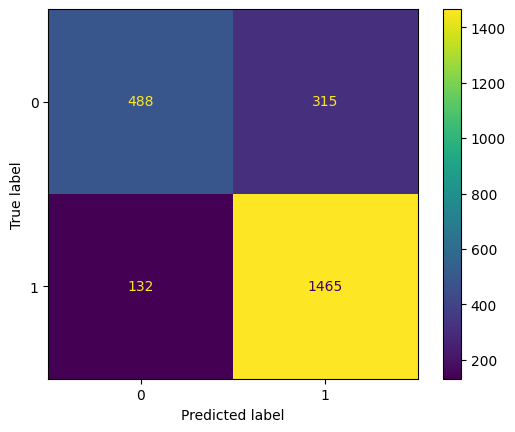

In [45]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(values_format='')
plt.show()

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
params = {
    'n_estimators':[100,200,300,400,500],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy'],
}

In [53]:
random = RandomizedSearchCV(estimator=rf, param_distributions=params,scoring= ['precision','accuracy','f1'], refit='precision', n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=-1)

In [54]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0, refit='precision',
                   scoring=['precision', 'accuracy', 'f1'], verbose=2)

In [56]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini'}

In [57]:
random.best_score_

0.8231106876042059

In [58]:
## Make predictions
rf_best = RandomForestClassifier(n_estimators = 500,
                                 min_samples_split = 10,
                                 min_samples_leaf = 1,
                                 max_features ='sqrt',
                                 max_depth = 50,
                                 criterion = 'gini')

In [59]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=500)

In [60]:
y_pred = rf_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.60      0.68       803
           1       0.82      0.93      0.87      1597

    accuracy                           0.82      2400
   macro avg       0.81      0.76      0.78      2400
weighted avg       0.81      0.82      0.81      2400



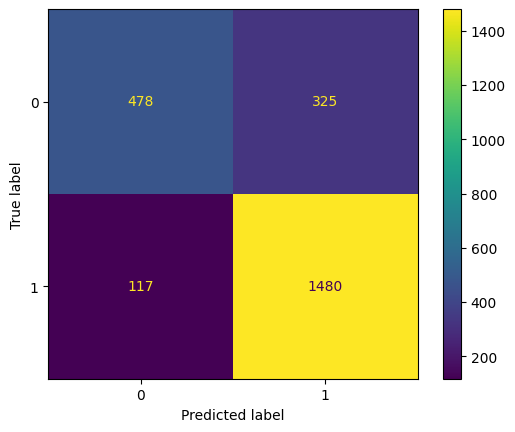

In [61]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_best.classes_)
disp.plot(values_format='')
plt.show()